In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
    
import tubemap

In [1]:
def create_networkx_graph(tubemap_dictionary):
    dct = {}
    for i, loc in enumerate(list(tubemap_dictionary.keys())):
        dct[loc] = i
    tubemap_new = {}
    for k, v in tubemap_dictionary.items():
        tubemap_new[dct[k]] = v
    for k, v in tubemap_new.items():
        _ = []
        for place in v:
            _.append(dct[place])
        tubemap_new[k] = _
    return nx.Graph(tubemap_new)

C:\Python37\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


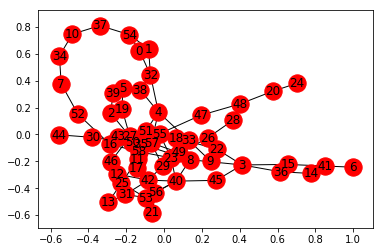

In [5]:
G = create_networkx_graph(tubemap.tubemap_dictionary)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [7]:
MATRIX_SIZE = len(G)

In [58]:
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [59]:
for node in G.nodes:
    for x in G[node]:
        if x == 4:
            R[node, x] = 100
            R[x,x] = 100
        else:
            R[node, x] = 0
            R[x, node] = 0

In [60]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pd.DataFrame(R))

     0    1    2    3      4    5    6    7    8    9    10   11   12   13  \
0  -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
1  -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
2  -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
3  -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0  0.0 -1.0 -1.0 -1.0 -1.0 -1.0   
4  -1.0 -1.0 -1.0 -1.0  100.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
5  -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
6  -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
7  -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
8  -1.0 -1.0 -1.0  0.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
9  -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
10 -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
11 -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0

In [48]:
Q = np.zeros_like(R)

In [49]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(2) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def epsilon_action(state, epsilon, graph, Q):
    rand = np.random.uniform()
    if rand < epsilon:
        sample = list(dict(graph[state]).keys())
        
        
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
  
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)
       
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

In [54]:
scores = []
for i in range(5000):
    current_state = np.random.randint(0, 59)
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state, action, 0.8)
    scores.append(score)
    print(score)

max_value 0.0
2843.538326908904
max_value 217.6970342400001
2844.473725316654
max_value 0.0
2844.473725316654
max_value 0.0
2844.473725316654
max_value 0.0
2844.473725316654
max_value 108.12129280000006
2844.473725316654
max_value 168.93952000000007
2844.473725316654
max_value 0.0
2844.473725316654
max_value 108.12129280000006
2884.206482605686
max_value 217.6970342400001
2915.9926884369115
max_value 135.15161600000008
2915.9926884369115
max_value 69.19762739200006
2915.9926884369115
max_value 86.49703424000006
2915.9926884369115
max_value 0.0
2915.9926884369115
max_value 0.0
2915.9926884369115
max_value 86.49703424000006
2915.9926884369115
max_value 108.12129280000006
2915.9926884369115
max_value 0.0
2915.9926884369115
max_value 69.19762739200006
2915.9926884369115
max_value 86.49703424000006
2947.7788942681373
max_value 0.0
2947.7788942681373
max_value 217.6970342400001
2947.7788942681373
max_value 0.0
2947.7788942681373
max_value 0.0
2947.7788942681373
max_value 0.0
2947.77889426813

max_value 205.03597134381062
4167.039921481039
max_value 139.3261019136001
4167.039921481039
max_value 176.29496417976327
4167.039921481039
max_value 112.82877707504849
4167.039921481039
max_value 220.3687052247041
4167.039921481039
max_value 112.82877707504849
4167.039921481039
max_value 176.29496417976327
4222.068693425574
max_value 0.0
4222.068693425574
max_value 220.3687052247041
4222.068693425574
max_value 174.1576273920001
4222.068693425574
max_value 176.29496417976327
4222.068693425574
max_value 176.29496417976327
4222.068693425574
max_value 176.29496417976327
4222.068693425574
max_value 0.0
4222.068693425574
max_value 56.40070522470404
4222.068693425574
max_value 112.82877707504849
4257.287107470076
max_value 135.15161600000008
4257.287107470076
max_value 0.0
4257.287107470076
max_value 176.29496417976327
4257.287107470076
max_value 90.2630216600388
4285.461838705679
max_value 139.3261019136001
4285.461838705679
max_value 22.674678543810586
4285.461838705679
max_value 111.46088

5808.8755168634525
max_value 256.29496417976327
5808.8755168634525
max_value 141.03597134381062
5808.8755168634525
max_value 205.03597134381062
5817.8467449189175
max_value 164.0287770750485
5825.023727363289
max_value 57.76833386242484
5825.450619445886
max_value 72.21041732803104
5825.450619445886
max_value 131.22302166003882
5825.450619445886
max_value 112.82877707504849
5825.450619445886
max_value 131.22302166003882
5825.450619445886
max_value 57.76833386242484
5825.450619445886
max_value 164.0287770750485
5832.627601890257
max_value 164.0287770750485
5832.627601890257
max_value 205.03597134381062
5832.627601890257
max_value 176.29496417976327
5832.627601890257
max_value 0.0
5832.627601890257
max_value 256.29496417976327
5832.627601890257
max_value 256.29496417976327
5843.841636959589
max_value 256.29496417976327
5843.841636959589
max_value 45.120564179763235
5843.841636959589
max_value 57.76833386242484
5843.841636959589
max_value 164.0287770750485
5843.841636959589
max_value 164.

5424.336880596491
max_value 83.98273386242487
5424.336880596491
max_value 141.03597134381062
5424.336880596491
max_value 90.2630216600388
5424.336880596491
max_value 72.21041732803104
5424.336880596491
max_value 141.03597134381062
5424.336880596491
max_value 112.82877707504849
5424.336880596491
max_value 256.29496417976327
5424.336880596491
max_value 90.2630216600388
5446.458609928204
max_value 176.29496417976327
5446.458609928204
max_value 112.82877707504849
5446.458609928204
max_value 131.22302166003882
5446.458609928204
max_value 83.98273386242487
5446.458609928204
max_value 205.03597134381062
5446.458609928204
max_value 46.21466708993987
5446.458609928204
max_value 261.1384173280311
5460.208239644615
max_value 176.29496417976327
5460.208239644615
max_value 176.29496417976327
5460.208239644615
max_value 131.22302166003882
5460.208239644615
max_value 261.1384173280311
5473.957869361026
max_value 131.22302166003882
5473.957869361026
max_value 90.2630216600388
5481.921691920443
max_val

6078.51896803827
max_value 326.42302166003884
6078.51896803827
max_value 104.97841732803107
6081.969859505318
max_value 341.1384173280311
6081.969859505318
max_value 90.2630216600388
6081.969859505318
max_value 90.2630216600388
6081.969859505318
max_value 326.42302166003884
6081.969859505318
max_value 57.76833386242484
6081.969859505318
max_value 426.42302166003884
6086.283473839127
max_value 131.22302166003882
6086.283473839127
max_value 131.22302166003882
6086.283473839127
max_value 341.1384173280311
6086.283473839127
max_value 112.82877707504849
6086.283473839127
max_value 112.82877707504849
6086.283473839127
max_value 326.42302166003884
6086.283473839127
max_value 261.1384173280311
6086.283473839127
max_value 104.97841732803107
6086.283473839127
max_value 341.1384173280311
6086.283473839127
max_value 441.1384173280311
5886.594382075437
max_value 90.2630216600388
5886.594382075437
max_value 131.22302166003882
5886.594382075437
max_value 208.91073386242488
5886.594382075437
max_value

6699.4930651354025
max_value 57.76833386242484
6699.4930651354025
max_value 352.9107338624249
6699.4930651354025
max_value 72.21041732803104
6699.4930651354025
max_value 115.64178927203939
6705.246082015166
max_value 180.69029573756154
6705.246082015166
max_value 167.1285870899399
6713.385378893316
max_value 72.21041732803104
6713.385378893316
max_value 180.69029573756154
6713.385378893316
max_value 352.9107338624249
6713.385378893316
max_value 352.9107338624249
6713.385378893316
max_value 225.86286967195193
6713.385378893316
max_value 139.73029573756156
6720.813432926441
max_value 352.9107338624249
6720.813432926441
max_value 180.69029573756154
6720.813432926441
max_value 144.55223659004923
6729.334554500973
max_value 46.21466708993987
6729.334554500973
max_value 133.70286967195193
6729.334554500973
max_value 180.69029573756154
6744.717825600676
max_value 225.86286967195193
6763.946914475306
max_value 218.3285870899399
6766.081812017116
max_value 225.86286967195193
6767.789730050565
m

7279.351910252482
max_value 72.21041732803104
7279.351910252482
max_value 362.3285870899399
7279.351910252482
max_value 180.69029573756154
7279.351910252482
max_value 231.8902957375616
7279.351910252482
max_value 180.69029573756154
7279.351910252482
max_value 180.69029573756154
7279.351910252482
max_value 144.55223659004923
7279.351910252482
max_value 218.3285870899399
7296.417660734254
max_value 452.9107338624249
7296.417660734254
max_value 352.9107338624249
7296.417660734254
max_value 231.8902957375616
7296.417660734254
max_value 144.55223659004923
7296.417660734254
max_value 72.21041732803104
7296.417660734254
max_value 225.86286967195193
7298.0811855789325
max_value 352.9107338624249
7298.0811855789325
max_value 57.76833386242484
7298.0811855789325
max_value 180.69029573756154
7298.0811855789325
max_value 180.69029573756154
7313.064605840093
max_value 144.55223659004923
7313.064605840093
max_value 180.69029573756154
7313.064605840093
max_value 144.55223659004923
7313.064605840093
m

7459.482464367545
max_value 74.01074513410522
7459.482464367545
max_value 174.66286967195194
7459.482464367545
max_value 144.55223659004923
7471.2250250583575
max_value 148.40978927203943
7471.2250250583575
max_value 139.73029573756156
7471.2250250583575
max_value 231.8902957375616
7471.2250250583575
max_value 185.51223659004927
7471.2250250583575
max_value 289.86286967195196
7471.2250250583575
max_value 92.51343141763152
7471.2250250583575
max_value 218.3285870899399
7471.2250250583575
max_value 92.51343141763152
7471.2250250583575
max_value 92.51343141763152
7471.2250250583575
max_value 118.72783141763155
7471.2250250583575
max_value 174.66286967195194
7471.2250250583575
max_value 369.86286967195196
7472.8546631106865
max_value 185.51223659004927
7472.8546631106865
max_value 231.8902957375616
7474.158373552549
max_value 174.66286967195194
7474.158373552549
max_value 94.98226513410525
7482.207612191656
max_value 148.40978927203943
7483.041986874448
max_value 289.86286967195196
7483.04

7591.873100221427
max_value 462.3285870899399
7591.873100221427
max_value 185.51223659004927
7591.873100221427
max_value 148.40978927203943
7591.873100221427
max_value 189.36978927203944
7592.707474904219
max_value 75.9858121072842
7592.707474904219
max_value 75.9858121072842
7593.134674741809
max_value 295.8902957375616
7594.438385183673
max_value 94.98226513410525
7594.438385183673
max_value 289.86286967195196
7594.438385183673
max_value 118.72783141763155
7594.438385183673
max_value 295.8902957375616
7594.438385183673
max_value 289.86286967195196
7594.438385183673
max_value 94.98226513410525
7594.438385183673
max_value 369.86286967195196
7594.438385183673
max_value 144.55223659004923
7594.438385183673
max_value 94.98226513410525
7594.438385183673
max_value 185.51223659004927
7594.438385183673
max_value 118.72783141763155
7594.438385183673
max_value 185.51223659004927
7594.438385183673
max_value 94.98226513410525
7594.438385183673
max_value 94.98226513410525
7594.438385183673
max_val

7568.601171808504
max_value 189.36978927203944
7568.601171808504
max_value 189.36978927203944
7571.731216881091
max_value 192.45583141763154
7572.388013224192
max_value 236.7122365900493
7572.388013224192
max_value 375.8902957375616
7572.388013224192
max_value 375.8902957375616
7572.388013224192
max_value 192.45583141763154
7574.892049282263
max_value 94.98226513410525
7574.892049282263
max_value 151.49583141763156
7574.892049282263
max_value 148.40978927203943
7574.892049282263
max_value 300.71223659004926
7575.9182935683575
max_value 300.71223659004926
7575.9182935683575
max_value 189.36978927203944
7576.7392889972325
max_value 240.56978927203943
7576.7392889972325
max_value 295.8902957375616
7576.7392889972325
max_value 189.36978927203944
7576.7392889972325
max_value 148.40978927203943
7576.7392889972325
max_value 148.40978927203943
7576.7392889972325
max_value 375.8902957375616
7578.02209435485
max_value 192.45583141763154
7578.02209435485
max_value 94.98226513410525
7578.022094354

7645.102531590527
max_value 375.8902957375616
7645.102531590527
max_value 300.71223659004926
7645.102531590527
max_value 300.71223659004926
7645.102531590527
max_value 189.36978927203944
7645.102531590527
max_value 153.96466513410525
7645.102531590527
max_value 96.95733210728422
7645.102531590527
max_value 153.96466513410525
7645.102531590527
max_value 192.45583141763154
7645.102531590527
max_value 192.45583141763154
7645.102531590527
max_value 240.56978927203943
7645.102531590527
max_value 300.71223659004926
7645.102531590527
max_value 151.49583141763156
7645.102531590527
max_value 375.8902957375616
7645.102531590527
max_value 236.7122365900493
7645.102531590527
max_value 192.45583141763154
7645.102531590527
max_value 375.8902957375616
7646.385336948145
max_value 185.51223659004927
7646.385336948145
max_value 121.19666513410526
7646.385336948145
max_value 192.45583141763154
7646.385336948145
max_value 192.45583141763154
7646.385336948145
max_value 153.96466513410525
7646.9107740226245

max_value 153.96466513410525
7492.250827726064
max_value 240.56978927203943
7492.250827726064
max_value 123.1717321072842
7492.250827726064
max_value 248.09973210728424
7493.804771657764
max_value 240.56978927203943
7493.804771657764
max_value 387.6558314176316
7496.2328090510455
max_value 387.6558314176316
7498.660846444326
max_value 153.96466513410525
7499.170336257998
max_value 484.5697892720395
7499.170336257998
max_value 387.6558314176316
7499.170336257998
max_value 310.12466513410527
7499.170336257998
max_value 307.6558314176316
7499.170336257998
max_value 153.96466513410525
7499.170336257998
max_value 307.6558314176316
7499.170336257998
max_value 192.45583141763154
7499.170336257998
max_value 387.6558314176316
7499.170336257998
max_value 240.56978927203943
7499.170336257998
max_value 123.1717321072842
7499.170336257998
max_value 192.45583141763154
7499.170336257998
max_value 123.1717321072842
7499.170336257998
max_value 153.96466513410525
7499.170336257998
max_value 192.45583141

7542.475454068128
max_value 198.4797856858274
7542.475454068128
max_value 192.45583141763154
7542.475454068128
max_value 387.6558314176316
7542.475454068128
max_value 392.09973210728424
7545.78266089178
max_value 198.4797856858274
7545.78266089178
max_value 198.4797856858274
7545.78266089178
max_value 240.56978927203943
7545.78266089178
max_value 490.12466513410527
7546.286376352784
max_value 312.09973210728424
7546.689348721587
max_value 158.78382854866194
7546.689348721587
max_value 313.6797856858274
7549.33511418051
max_value 198.4797856858274
7549.33511418051
max_value 312.09973210728424
7549.738086549312
max_value 153.96466513410525
7549.738086549312
max_value 127.02706283892957
7549.738086549312
max_value 127.02706283892957
7549.738086549312
max_value 198.4797856858274
7551.596796600416
max_value 198.4797856858274
7551.596796600416
max_value 392.09973210728424
7554.90400342407
max_value 392.09973210728424
7558.211210247723
max_value 240.56978927203943
7558.211210247723
max_value 

In [55]:
print("Trained Q matrix:")
print(pd.DataFrame(Q/np.max(Q)*100))


Trained Q matrix:
           0     1         2          3           4          5          6   \
0    0.000000   0.0   0.00000   0.000000    0.000000   0.000000   0.000000   
1    0.000000   0.0   0.00000   0.000000    0.000000   0.000000   0.000000   
2    0.000000   0.0   0.00000   0.000000    0.000000   0.000000   0.000000   
3    0.000000   0.0   0.00000   0.000000    0.000000   0.000000   0.000000   
4    0.000000   0.0   0.00000   0.000000   99.496285   0.000000   0.000000   
5    0.000000   0.0   0.00000   0.000000    0.000000   0.000000   0.000000   
6    0.000000   0.0   0.00000   0.000000    0.000000   0.000000   0.000000   
7    0.000000   0.0   0.00000   0.000000    0.000000   0.000000   0.000000   
8    0.000000   0.0   0.00000  31.413368    0.000000   0.000000   0.000000   
9    0.000000   0.0   0.00000   0.000000    0.000000   0.000000   0.000000   
10   0.000000   0.0   0.00000   0.000000    0.000000   0.000000   0.000000   
11   0.000000   0.0   0.00000   0.000000    0.

Most efficient path:
[2, 39, 38, 4]


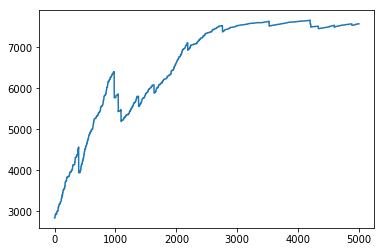

In [61]:
current_state = 2
steps = [current_state]

while current_state != 4:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

In [1]:
# %load basic.py
#!/usr/bin/env python3

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import tubemap

# This converts our tubemap dictionary to ids in alphabetical order. 
# For example, the first entry Aldgate: [Liverpool Street, Tower Hill] -> 0: [33, 57]
# It then converts the dictionary into a networkx graph, because getting each connection is easier using networkx
def create_networkx_graph(tubemap_dictionary):
  dct = {}
  for i, loc in enumerate(list(tubemap_dictionary.keys())):
    dct[loc] = i
  tubemap_new = {}
  for k, v in tubemap_dictionary.items():
    tubemap_new[dct[k]] = v
  for k, v in tubemap_new.items():
    _ = []
    for place in v:
      _.append(dct[place])
    tubemap_new[k] = _
  return nx.Graph(tubemap_new)

# We initialise R by putting a reward of 100 wherever the action is going to the desired end location, and 0s everywhere else
def initialise_R(nx_graph, end_loc):
  R = -1 * np.matrix(np.ones(shape=(len(nx_graph),len(nx_graph))))
  for node in nx_graph.nodes:
    for x in nx_graph[node]:
      if x == end_loc:
        R[node, x] = 100
        R[x,x] = 100
      else:
        R[x, node] = 0
        R[node, x] = 0
  return R

# We initialise Q by giving every state, action pair -100, and then giving any actual connection (state, action) 0 
def initialise_Q(nx_graph):
  Q = np.matrix(np.zeros(shape = (len(nx_graph), len(nx_graph))))
  Q -= 100
  for node in nx_graph.nodes:
    for x in nx_graph[node]:
      Q[node, x] = 0
      Q[x, node] = 0
  return Q

#def initialise_Q(nx_graph):
#  return np.matrix(np.zeros(shape = (len(nx_graph), len(nx_graph))))

# We check if epsilon (which we set) is less than a random number between 0 and 1. 
# If rand < epsilon, the algorithm explores, if rand >= epsilon, we get all states and choose one with the highest reward (randomly if more than 1)
def epsilon_policy(state, epsilon, graph, Q):
  rand = np.random.uniform()
  if rand < epsilon:
    sample = list(dict(graph[state]).keys())
  else:
    sample = np.where(Q[state,] == np.max(Q[state,]))[1]
  action = np.random.choice(sample)
  return action

# Boltzmann (softmax) policy - calculates the probabilities of each action for a state, then selects pseurandomly based on these probabilities
def boltzmann_policy(state, tau, graph, Q):
  exp_values  = np.exp(Q[state,] / tau)
  probs = exp_values / np.sum(exp_values)
  action = np.random.choice(range(Q.shape[0]), p = probs.tolist()[0])
  return action

# Updates the Q-matrix using the Bellman equation
def update_Q(state, action, learning_rate, gamma, Q, R):
  max_idx = np.where(Q[action,] == np.max(Q[action,]))[1]
  if max_idx.shape[0] > 1:
    max_idx = np.random.choice(max_idx)
  max_idx = int(max_idx)
  Q[state, action] = int((1-learning_rate)*Q[state, action] + learning_rate*(R[state, action] + gamma* Q[action, max_idx]))
#  Q[state, action] = R[state, action] + gamma * Q[action, max_idx]
  if np.max(Q) > 0:
    return np.sum(Q)/np.max(Q)*100
  else:
    return 0

# Finds the shortest path from start by finding the highest action reward at each state until the end
# Returns a string of the stations in the shortest path separated by ->
def shortest_path(start, end, Q):
  path = [start]
  next_action = np.argmax(Q[start,])
  path.append(next_action)
  while next_action != end:
    next_action = np.argmax(Q[next_action,])
    path.append(next_action)
  #return len([tubemap.num_convert(station) for station in path])
  return len(path)

# Starts randomly for a set amount of episodes, updating Q as it goes along
# Implemented greedy-epsilon policy, where epsilon is reduced on each episode
def learn(R, learning_rate, gamma, num_episodes, graph, policy, parameter, start, end):
  assert policy == 'boltzmann' or policy == 'epsilon'
  Q = initialise_Q(graph)
  scores = [0]*num_episodes
  #steps = [0]*num_episodes
  cumulative_reward = 0
  step = 0
  for i in range(num_episodes):
    loc = np.random.randint(0, len(graph))
#    while loc != end:
    start_loc = loc
    if policy == 'boltzmann':
      loc = boltzmann_policy(loc, parameter, graph, Q)
    elif policy == 'epsilon':
      loc = epsilon_policy(loc, parameter, graph, Q)
    score = update_Q(start_loc, loc, learning_rate, gamma, Q, R)
    
    if score!=0:
      print(score)
    scores[i] += score
    parameter *= 0.99 
  return scores#, steps

if __name__ == '__main__':
  while True:
    start = input('Start station: ').strip().title()
    end = input('End station: ').strip().title()
    if start not in tubemap.tubemap_dictionary.keys() or end not in tubemap.tubemap_dictionary.keys():
      print("Stations were invalid, please input again")
      continue
    else:
      start = int(tubemap.place_convert(start)) 
      end = int(tubemap.place_convert(end))
      print(start,end)
      break
  g = create_networkx_graph(tubemap.tubemap_dictionary)
  R = initialise_R(g, end)
  import pandas as pd
  with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(pd.DataFrame(R))
  scores = learn(R, learning_rate = 0.8, gamma = 0.6, num_episodes = 10000, graph = g, policy = 'epsilon', parameter = 0.5, start = start, end=end) 
  plt.plot(scores)
  plt.show()



IndentationError: unexpected indent (<ipython-input-1-dd370f69c776>, line 13)